In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataBeforeCleanning.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


<h1><center>assessment</center></h1>

tidy issue: the column name contain two values first value is surname and second value is full name
<h3 style = "color:red;">we should split the column into two column the first column is surname and second is full name</h3>
but first we should take a copy from orignal data before starting cleanning

In [4]:
data_copy = data.copy()

In [5]:
data_copy[["surname","full name"]] = data_copy["Name"].str.split(",",1,expand = True)

In [6]:
data_copy.drop("Name",axis = 1,inplace = True)

In [7]:
data_copy.Fare.mean()

33.2954792813456

In [8]:
list(data_copy)

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'WikiId',
 'Name_wiki',
 'Age_wiki',
 'Hometown',
 'Boarded',
 'Destination',
 'Lifeboat',
 'Body',
 'Class',
 'surname',
 'full name']

<h1> quality issues</h1>
<h3>second issue : there are a lot of duplicate and redundancy columns Like </h3> <br>Age and Age_wiki <br>Name and Name wiki<br> PassengerId and WikiId
<h2 style = " color:cyan;">solutoin : </h2><h3 style = "color:green;">we should drop the duplicated information columns<h3/> 

In [9]:
data_copy.drop(["Name_wiki","Age_wiki","WikiId","Class"],axis = 1,inplace = True)

In [10]:
list(data_copy)

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Hometown',
 'Boarded',
 'Destination',
 'Lifeboat',
 'Body',
 'surname',
 'full name']

In [11]:
data_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hometown,Boarded,Destination,Lifeboat,Body,surname,full name
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,Braund,Mr. Owen Harris
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,Heikkinen,Miss. Laina
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,Allen,Mr. William Henry


<h1>third issue:</h1> <h3> there is missing value in Age column</h3>
<h3 style = "color:cyan;">solution</h3>
<p style = "color:green;">we should fill the missing value with the mean</p>

In [12]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Hometown     1304 non-null   object 
 12  Boarded      1304 non-null   object 
 13  Destination  1304 non-null   object 
 14  Lifeboat     502 non-null    object 
 15  Body         130 non-null    object 
 16  surname      1309 non-null   object 
 17  full name    1309 non-null   object 
dtypes: float64(3), int64(4), object(11)
memory usage

In [13]:
data_copy["Age"].isnull().sum()

263

In [14]:
data_copy["Age"].mean()

29.881137667304014

In [15]:
data_copy["Age"] = data_copy["Age"].fillna(data_copy["Age"].mean())

In [16]:
data_copy["Age"].isnull().sum()

0

In [17]:
data_copy["Age"].mean()

29.881137667303985

In [18]:
data_copy.tail(29)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hometown,Boarded,Destination,Lifeboat,Body,surname,full name
1280,1281,NaN,3,male,6.000000,3,1,349909,21.0750,NaN,S,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,Palsson,Master. Paul Folke
1281,1282,NaN,1,male,23.000000,0,0,12749,93.5000,B24,S,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,Payne,Mr. Vivian Ponsonby
1282,1283,NaN,1,female,51.000000,0,1,PC 17592,39.4000,D28,S,"Paris, France",Cherbourg,"Hanover, New Hampshire, US",9,NaN,Lines,Mrs. Ernest H (Elizabeth Lindsey James)
1283,1284,NaN,3,male,13.000000,0,2,C.A. 2673,20.2500,NaN,S,"East Providence, Rhode Island, US",Southampton,"East Providence, Rhode Island, US",NaN,NaN,Abbott,Master. Eugene Joseph
1284,1285,NaN,2,male,47.000000,0,0,C.A. 30769,10.5000,NaN,S,"Carleens, Cornwall, England",Southampton,"Butte, Montana, US",NaN,NaN,Gilbert,Mr. William
1285,1286,NaN,3,male,29.000000,3,1,315153,22.0250,NaN,S,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin",2,NaN,Kink-Heilmann,Mr. Anton
1286,1287,NaN,1,female,18.000000,1,0,13695,60.0000,C31,S,"Huntington, West Virginia, US",Cherbourg,"Huntington, West Virginia, US",6,NaN,Smith,Mrs. Lucien Philip (Mary Eloise Hughes)
1287,1288,NaN,3,male,24.000000,0,0,371109,7.2500,NaN,Q,"Kilkinlea, Limerick, Ireland",Queenstown,"Sherbrooke, Quebec, Canada",NaN,NaN,Colbert,Mr. Patrick
1288,1289,NaN,1,female,48.000000,1,1,13567,79.2000,B41,C,"Zürich, Switzerland",Cherbourg,"New York, New York, US",5,NaN,Frolicher-Stehli,Mrs. Maxmillian (Margaretha Emerentia Stehli)
1289,1290,NaN,3,male,22.000000,0,0,347065,7.7750,NaN,S,"Lysvik, Värmland, Sweden",Southampton,"Missoula, Montana, US",NaN,NaN,Larsson-Rondberg,Mr. Edvard A


In [19]:
data_copy.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
surname           0
full name         0
dtype: int64

<h1>fourth issue:</h1>
<h3>most of the cabin column data is missing
<h2 style = "color:cyan;"></h2><h3>drop the cabin column </h3>

In [20]:
data_copy.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
surname           0
full name         0
dtype: int64

In [21]:
data_copy.drop("Cabin",axis = 1,inplace = True)

In [22]:
list(data_copy)

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked',
 'Hometown',
 'Boarded',
 'Destination',
 'Lifeboat',
 'Body',
 'surname',
 'full name']

<h1>the fourth issue </h1><br><h3>there is missing values in lifeboat and body columns</h3>
<h2 style = "color:cyan;">solution</h2><br>drop lifeboat and body columns

In [23]:
data_copy.drop(["Lifeboat","Body"],axis = 1,inplace = True)

In [24]:
data_copy.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
Hometown         5
Boarded          5
Destination      5
surname          0
full name        0
dtype: int64

In [25]:
data_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Hometown,Boarded,Destination,surname,full name
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Braund,Mr. Owen Harris
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,"New York, New York, US",Cherbourg,"New York, New York, US",Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,"Jyväskylä, Finland",Southampton,New York City,Heikkinen,Miss. Laina
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,"Birmingham, West Midlands, England",Southampton,New York City,Allen,Mr. William Henry


<h1>fifth issues</h1>Some columns names arenot interpretable such like Sibsp column and parch 
<h2 style = "color:cyan;">solution</h3>
<h3 style = "color:green;">rename column names to obvious names</h3> 

In [26]:
data_copy.rename(columns={"SibSp": "Number of sublings","Parch":"Number of parernts and children"}, inplace=True)
data_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,Number of sublings,Number of parernts and children,Ticket,Fare,Embarked,Hometown,Boarded,Destination,surname,full name
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Braund,Mr. Owen Harris
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,"New York, New York, US",Cherbourg,"New York, New York, US",Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,"Jyväskylä, Finland",Southampton,New York City,Heikkinen,Miss. Laina
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,"Birmingham, West Midlands, England",Southampton,New York City,Allen,Mr. William Henry


<h1>Sixth issue:</h1>there columns contain string data which we not fit in clustering model
<h2 style="color:cyan;">solution</h2>
<h3 style = "color:green;">convert string into numeric data using LabelEncoder class</h3>

In [27]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(data_copy["Sex"])

LabelEncoder()

In [28]:
data_copy["Sex"] = LE.transform(data_copy["Sex"])

In [29]:
list(data_copy)

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'Number of sublings',
 'Number of parernts and children',
 'Ticket',
 'Fare',
 'Embarked',
 'Hometown',
 'Boarded',
 'Destination',
 'surname',
 'full name']

<h3 style = "color:red;">other columns that contain non numeric values like Hometown , Boarded,Destination,Name are not effective in result so we will just choice the columns that might effect the results</h3>

In [30]:
data_copy = data_copy[["Survived","Age","Pclass","Sex","Number of parernts and children","Fare","Number of sublings"]]

In [31]:
data_copy

,Survived,Age,Pclass,Sex,Number of parernts and children,Fare,Number of sublings
0,0.0,22.000000,3,1,0,7.2500,1
1,1.0,38.000000,1,0,0,71.2833,1
2,1.0,26.000000,3,0,0,7.9250,0
3,1.0,35.000000,1,0,0,53.1000,1
4,0.0,35.000000,3,1,0,8.0500,0
...,...,...,...,...,...,...,...
1304,NaN,29.881138,3,1,0,8.0500,0
1305,NaN,39.000000,1,0,0,108.9000,0
1306,NaN,38.500000,3,1,0,7.2500,0
1307,NaN,29.881138,3,1,0,8.0500,0


<h1>Seventh issue: the survived column has a lot of missing values</h1>
<h2 style ="color:cyan;">solution</h2>
store the data which contain missing values in seprated file then build a clustering model to predict the
survived values

In [32]:
cleaned_data = data_copy[data_copy.Survived.isnull() == False]
test_data = data_copy[data_copy.Survived.isnull()]

In [33]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Survived                         891 non-null    float64
 1   Age                              891 non-null    float64
 2   Pclass                           891 non-null    int64  
 3   Sex                              891 non-null    int32  
 4   Number of parernts and children  891 non-null    int64  
 5   Fare                             891 non-null    float64
 6   Number of sublings               891 non-null    int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 52.2 KB


In [34]:
cleaned_data.head()

,Survived,Age,Pclass,Sex,Number of parernts and children,Fare,Number of sublings
0,0.0,22.0,3,1,0,7.2500,1
1,1.0,38.0,1,0,0,71.2833,1
2,1.0,26.0,3,0,0,7.9250,0
3,1.0,35.0,1,0,0,53.1000,1
4,0.0,35.0,3,1,0,8.0500,0


In [35]:
cleaned_data.to_csv("cleaned.csv")

<h1 style = "color:red;"><center>Data visualization</center></h1>

# box plots

<AxesSubplot:>

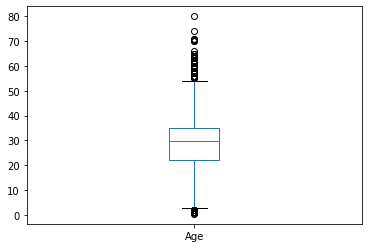

In [36]:
cleaned_data.Age.plot(kind = "box")

<h1>conclusion</h1>
the age column has an outliers but we shouldn't remove it because its normal to have very old people and children.
the median age is about thirty and the range from zero to eighty.

<AxesSubplot:>

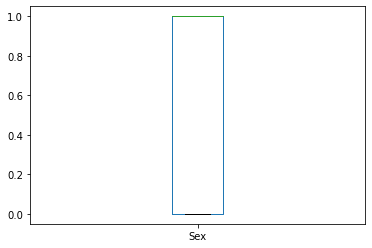

In [37]:
cleaned_data.Sex.plot(kind = "box")

<h1>Conclusion</h1>

Sex column is has only two values : one ,which represent men and zero which represent women

<AxesSubplot:>

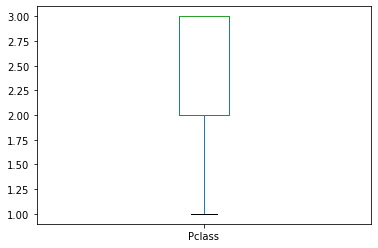

In [38]:
cleaned_data.Pclass.plot(kind = "box")

<h1>conclusion</h1>
passenger clss minimum value equal one , the maximum value equal three and the mean equal (and median) equal 2

# Frequency

<AxesSubplot:ylabel='Frequency'>

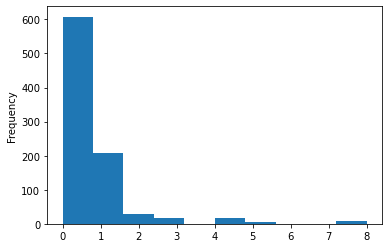

In [39]:
cleaned_data["Number of sublings"].plot(kind = "hist")

<h1>Conclusion</h1>
most of the passengers have no sublings on the ship so the mode of Number of sublings column equal 0 and the range is from 0 to 8 

<AxesSubplot:>

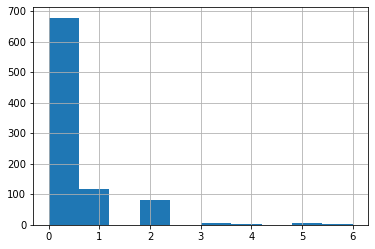

In [40]:
cleaned_data["Number of parernts and children"].hist()

<AxesSubplot:xlabel='Age', ylabel='Survived'>

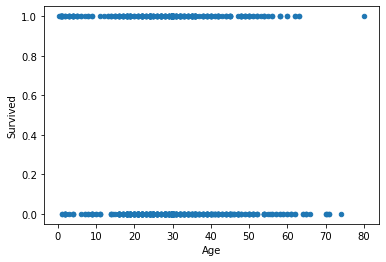

In [41]:
cleaned_data.plot(x = "Age",y = "Survived",kind = "scatter")

<AxesSubplot:>

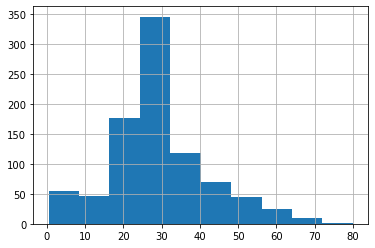

In [42]:
cleaned_data.Age.hist()

the passengers ages follow right skewed normal distribution which have mean and mode thirty

<AxesSubplot:>

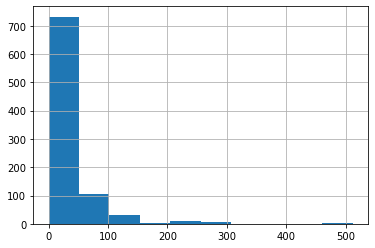

In [43]:
cleaned_data.Fare.hist()

<AxesSubplot:>

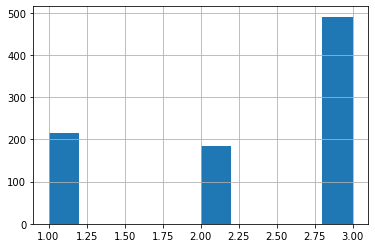

In [44]:
cleaned_data.Pclass.hist()

the most frequent passenger class is 3.

C:\Users\ALYOSER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


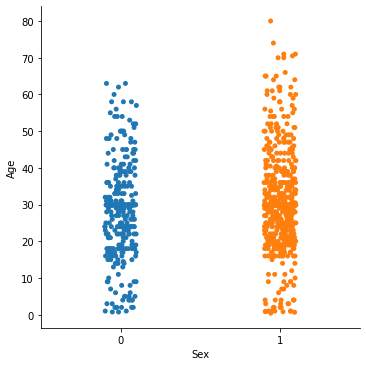

In [45]:
seaborn.catplot("Sex","Age",data = cleaned_data)

<h1>conclusion</h1>the survivor people have a range greater than the dead ones

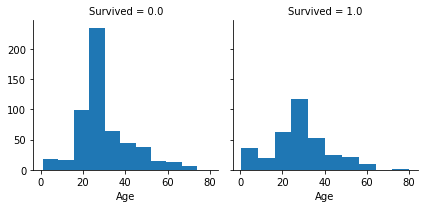

In [46]:
Survive = seaborn.FacetGrid(cleaned_data,col = "Survived")
Survive.map(plt.hist,"Age")

<h1>Conclusion</h1>from the charts above we can conclude that youth from 20 to 40 have a more chance to die and childrens and old people have a more chance to survive

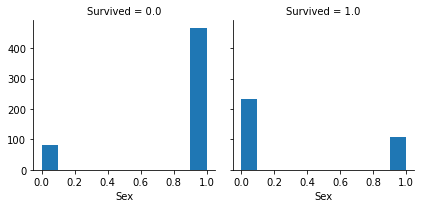

In [47]:
Survive = seaborn.FacetGrid(cleaned_data,col = "Survived")
Survive.map(plt.hist,"Sex")

<h1>conclusion</h1>
from the visualization we can conclude that the women(which take zero values) has more chance to survive than men

# data clustering

while the cleanning we was having isssue with the survive column so we splited the data into two files
<br> so we will make a prediction for the missing values in survive column using kmean clustering model

In [48]:
test_data.head()

,Survived,Age,Pclass,Sex,Number of parernts and children,Fare,Number of sublings
891,NaN,34.5,3,1,0,7.8292,0
892,NaN,47.0,3,0,0,7.0000,1
893,NaN,62.0,2,1,0,9.6875,0
894,NaN,27.0,3,1,0,8.6625,0
895,NaN,22.0,3,0,1,12.2875,1


In [49]:
test_data.isnull().sum()

Survived                           418
Age                                  0
Pclass                               0
Sex                                  0
Number of parernts and children      0
Fare                                 1
Number of sublings                   0
dtype: int64

In [50]:
X = np.array(cleaned_data.drop(['Survived'], 1).astype(float))
y = np.array(cleaned_data['Survived'])

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [52]:
scalling = MinMaxScaler()
X = scalling.fit_transform(X)

In [53]:
clusterModel = KMeans(n_clusters=2)
clusterModel.fit(X)

KMeans(n_clusters=2)

after we made clustering model we calculate accuracy using our cleaned data which contain survived values

In [54]:
(cleaned_data["Survived"] == clusterModel.predict(X)).sum()

701

there is 701 matching from 891 so model accuracy is : 701/891 = .78
and we can use this model to predict missing values in test data set

In [55]:
test_data_copy = test_data
test_data_copy = test_data_copy[test_data_copy['Fare'].notna()]
test_data_copy_x = np.array(test_data_copy.drop(['Survived'], 1).astype(float))

In [56]:
scalled_test = scalling.fit_transform(test_data_copy_x)

In [57]:
missing_values =  clusterModel.predict(scalled_test)
test_data_copy["Survived"] = missing_values

<ipython-input-57-63c9bab5ab6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_copy["Survived"] = missing_values


In [58]:
test_data_copy

,Survived,Age,Pclass,Sex,Number of parernts and children,Fare,Number of sublings
891,0,34.500000,3,1,0,7.8292,0
892,1,47.000000,3,0,0,7.0000,1
893,0,62.000000,2,1,0,9.6875,0
894,0,27.000000,3,1,0,8.6625,0
895,1,22.000000,3,0,1,12.2875,1
...,...,...,...,...,...,...,...
1304,0,29.881138,3,1,0,8.0500,0
1305,1,39.000000,1,0,0,108.9000,0
1306,0,38.500000,3,1,0,7.2500,0
1307,0,29.881138,3,1,0,8.0500,0


finally we should save the test data after we estimated missing value

In [59]:
test_data_copy.to_csv("testDataAFterClustering.csv")

In [60]:
test_data.head()

,Survived,Age,Pclass,Sex,Number of parernts and children,Fare,Number of sublings
891,NaN,34.5,3,1,0,7.8292,0
892,NaN,47.0,3,0,0,7.0000,1
893,NaN,62.0,2,1,0,9.6875,0
894,NaN,27.0,3,1,0,8.6625,0
895,NaN,22.0,3,0,1,12.2875,1
